# Video Game Sales Analysis 

![vg_gif](Bhn4.gif)

## Description:
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

### Fields include:

- Name - The games name

- Platform - Platform of the games release (i.e. PC,PS4, etc.)

- Year - Year of the game's release

- Genre - Genre of the game

- Publisher - Publisher of the game

- NA_Sales - Sales in North America (in millions)

- EU_Sales - Sales in Europe (in millions)

- JP_Sales - Sales in Japan (in millions)

- Other_Sales - Sales in the rest of the world (in millions)

- Global_Sales - Total worldwide sales.


## Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
from plotly.tools import FigureFactory as ff
from scipy import stats
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
df = pd.read_csv("dataset/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
d=df.head(4)
table = ff.create_table(d)
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 7
iplot(table)

## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [6]:
df.shape

(16598, 11)

In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [9]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

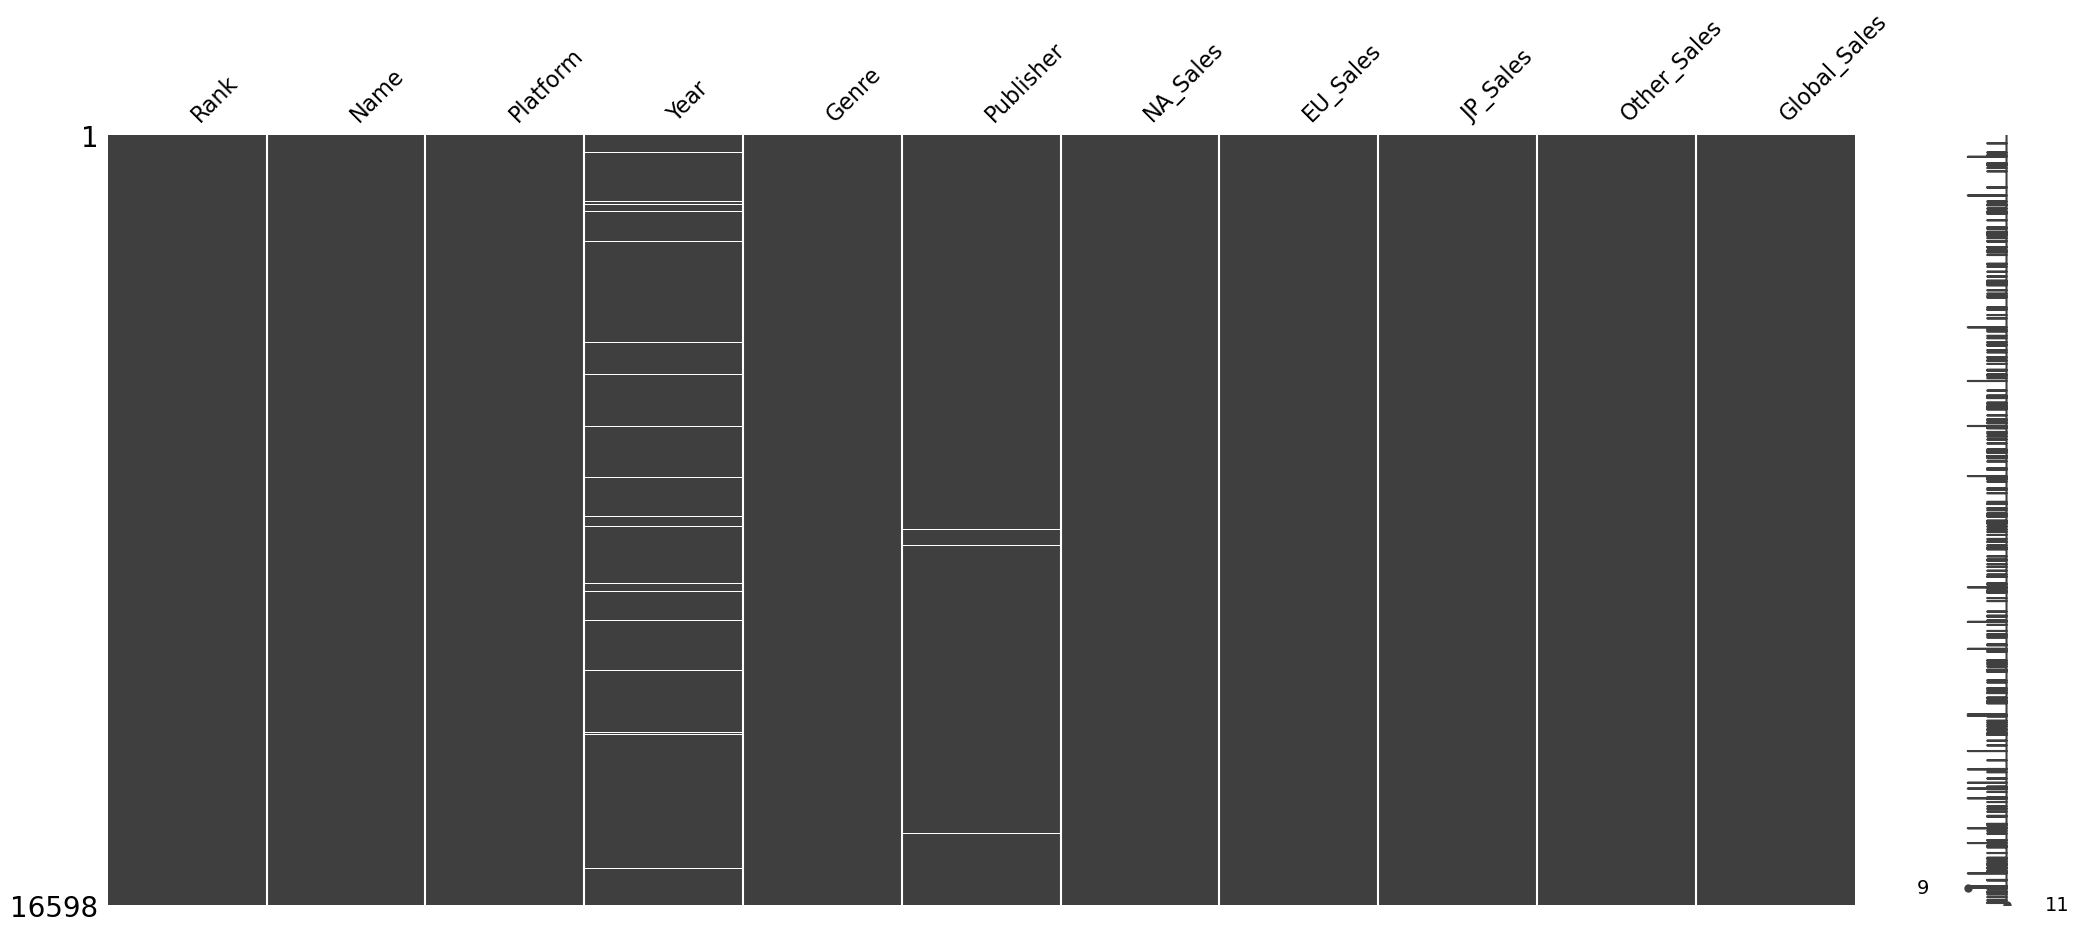

In [10]:
msno.matrix(df);

In [11]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [12]:
#Droping NaN values and some incomplete data
drop_row_index = df[df["Year"] > 2015].index
df = df.drop(drop_row_index)
df.dropna(subset = ["Year", "Publisher"], inplace=True)
df.isna().sum()


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Overall Stats

In [13]:
games = df["Name"].unique()
publisher = df["Publisher"].unique()
platforms = df["Platform"].unique()
genres = df["Genre"].unique()

In [14]:
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(games),
    title = {"text": "Games","font": {"color": "red","size":20}},
    number={"font":{"color": "red","size":50}},
    domain = {"row": 0, "column": 0}
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(publisher),
    title = {"text": "Publishers","font": {"color": "green","size":20}},
    number={"font":{"color": "green","size":50}},
    domain = {"row": 0, "column": 1}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(platforms),
    title = {"text": "Platforms","font": {"color": "darkviolet","size":20}},
    number={"font":{"color": "darkviolet","size":50}},
    domain = {"row": 0, "column": 2}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(genres),
    title = {"text": "Genres","font": {"color": "deepskyblue","size":20}},
    number={"font":{"color": "deepskyblue","size":50}},
    domain = {"row": 0, "column": 3}
))

fig.update_layout(
    grid = {"rows": 1, "columns": 4, "pattern": "independent"})
fig.show()

## General Visualisations

In [15]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Video Game Count by Genre

In [16]:
genre_wise_game =  df.groupby('Genre')['Name'].count().reset_index().sort_values("Name",ascending=False)
genre_wise_game = genre_wise_game.reset_index()
genre_wise_game.drop("index",axis = 1,inplace=True)

In [17]:
fig = go.Figure([go.Pie(labels=genre_wise_game['Genre'], 
                        values=genre_wise_game['Name'],
                        hole=0.3)])  

fig.update_traces(hoverinfo='label+percent+value', 
                  textinfo='percent', 
                  textfont_size=15,
                  marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title="Genre Wise Game Count",title_x=0.5)
fig.show()

### Sales by Genre

In [18]:
sales_by_genre = df.groupby(['Genre','Name'], axis = 0).sum().reset_index()[['Genre','Name','Global_Sales']]

In [19]:
genres = sales_by_genre.Genre.unique()
traces = []

for i in range(len(genres)):
    genre = genres[i]
    df_genre = sales_by_genre[sales_by_genre.Genre == genre]
    trace = go.Box(
        y=np.array(df_genre.Global_Sales),
        name=genre,
        boxmean=True    )
    
    traces.append(trace)

layout = go.Layout(
    title='Sales by Genre (With outliers)',
    showlegend=False,
    yaxis=dict(
        title='Sales (in Millions)'
    ),
    height=700, width=700,
    margin=go.Margin(
        l=100,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)
    

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

### Global Sales of Gaming Platforms

In [20]:
platformlist = list(df["Platform"].unique())
platformearns = []
for i in platformlist:
    x = df[df["Platform"] == i]
    sums = sum(x.Global_Sales)
    platformearns.append(sums)
    
data = pd.DataFrame({"platformlist": platformlist, "platformearns": platformearns})
new_index = (data["platformearns"].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

trace1 = go.Bar(
                x = sorted_data.platformlist,
                y = sorted_data.platformearns,
                name = "Global Sales of Platforms",
                marker = dict(color = "rgba(10,255,50,0.7)",line = dict(color="rgb(0,0,0)",width=1)))
data = [trace1]
layout = dict(title = "Global Sales of Gaming Platforms")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

### Top 100 Video Games

In [21]:
df_top_100 = df.head(100)
df_top_100

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37


In [22]:
df_top_100["Name"]

0                                 Wii Sports
1                          Super Mario Bros.
2                             Mario Kart Wii
3                          Wii Sports Resort
4                   Pokemon Red/Pokemon Blue
                       ...                  
95    Crash Bandicoot 2: Cortex Strikes Back
96                       Super Mario Bros. 2
97       Super Smash Bros. for Wii U and 3DS
98                Call of Duty: World at War
99                             Battlefield 3
Name: Name, Length: 100, dtype: object

### Top 100 video games based on different regions

In [23]:
trace1 = go.Scatter(
                    x = df_top_100["Rank"],
                    y = df_top_100["NA_Sales"],
                    mode = "markers",
                    name = "North America",
                    marker = dict(color = 'blue',size=8, line_width=1),
                    text= df_top_100["Name"],
                    )

                                        
trace2 = go.Scatter(
                    x = df_top_100["Rank"],
                    y = df_top_100["EU_Sales"],
                    mode = "markers",
                    name = "Europe",
                    marker = dict(color = 'green',size=8, line_width=1),
                    text= df_top_100["Name"],
                    )

trace3 = go.Scatter(
                    x = df_top_100["Rank"],
                    y = df_top_100["JP_Sales"],
                    mode = "markers",
                    name = "Japan",
                    marker = dict(color = 'red',size=8, line_width=1),
                    text= df_top_100["Name"], 
                    )

trace4 = go.Scatter(
                    x = df_top_100["Rank"],
                    y = df_top_100["Other_Sales"],
                    mode = "markers",
                    name = "Other",
                    marker = dict(color = 'aqua',size=8, line_width=1),
                    text= df_top_100["Name"])

layout = dict(title = "Top 100 Video Games Based On Different Regions",
             xaxis = dict(title = "Rank", ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
             yaxis = dict(title = "Sales(in millions)", ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
             )

data = [trace1, trace2, trace3, trace4]
fig = dict(data = data, layout = layout)
iplot(fig)
                 

### Publishers Of Top 100 Video Games

In [24]:
df_top_100.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [25]:
trace = go.Histogram(x=df_top_100["Publisher"],marker=dict(color="rgba(10,255,50,0.7)",line=dict(color="black", width=2)),opacity=0.75)
layout = go.Layout(
    title='Numbers of Top 100 Video Games Publishers',
    xaxis=dict(
        title="Publishers"
    ),
    yaxis=dict(
        title="Count"
    ),
    bargap=0.2,
    bargroupgap=0.1)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Sales Distribution

In [26]:
df2 = df.groupby(by="Year", as_index=True).sum()
df2.drop(["Rank"], axis=1, inplace=True)
df2.head()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.77
1982.0,26.92,1.65,0.00,0.31,28.86
1983.0,7.76,0.80,8.10,0.14,16.79
1984.0,33.28,2.10,14.27,0.70,50.36


In [27]:
ry=[]
for i in range(1980,2016):
    ry.append(i)
df2["Release_Year"] = ry


In [28]:
df2.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Release_Year
Year,,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38,1980
1981.0,33.40,1.96,0.00,0.32,35.77,1981
1982.0,26.92,1.65,0.00,0.31,28.86,1982
1983.0,7.76,0.80,8.10,0.14,16.79,1983
1984.0,33.28,2.10,14.27,0.70,50.36,1984


In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2["Release_Year"], y=df2["NA_Sales"], 
                        mode="lines", name="North America"))
fig.add_trace(go.Scatter(x=df2["Release_Year"], y=df2["EU_Sales"], 
                        mode="lines", name="Europe"))
fig.add_trace(go.Scatter(x=df2["Release_Year"], y=df2["JP_Sales"], 
                        mode="lines", name="Japan"))
fig.add_trace(go.Scatter(x=df2["Release_Year"], y=df2["Other_Sales"], 
                        mode="lines", name="Other"))
fig.update_layout(title="Total sales per year by region (in Millions)",
                 xaxis=dict(title="Years"),
                 yaxis=dict(title="Regions"))


### Region Wise Game Sales by Platform

In [30]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=df_top_100['NA_Sales'], 
               y=df_top_100['Platform'],
               mode='markers',
               name = "North America",
               marker=dict(size=df_top_100['NA_Sales'])))
fig.add_trace(
    go.Scatter(x=df_top_100['EU_Sales'], 
               y=df_top_100['Platform'],
               mode='markers',
               name = "Europe", 
               marker=dict(size=df_top_100['EU_Sales']))) 
fig.add_trace(
    go.Scatter(x=df_top_100['JP_Sales'], 
               y=df_top_100['Platform'],
               mode='markers',
               name = "Japan",
               marker=dict(size=df_top_100['JP_Sales']))) 
fig.add_trace(
    go.Scatter(x=df_top_100['Other_Sales'], 
               y=df_top_100['Platform'],
               mode='markers',
               name = "Other Regions",
               marker=dict(size=df_top_100['Other_Sales'])))

fig.update_layout(title_text='Region Wise Game Sales by Platform',xaxis_title="Sales in $M",yaxis_title="Platform")  

### Regional Sales by Genre

In [31]:
genre = df['Genre'].unique()
genre_s = sorted(genre)
na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]
global_sales=[]
for i in genre_s:
    val= df[df.Genre==i]
    na_sales.append(val.NA_Sales.sum())
    eu_sales.append(val.EU_Sales.sum())
    jp_sales.append(val.JP_Sales.sum())
    other_sales.append(val.Other_Sales.sum())

In [32]:
fig = go.Figure()
fig.add_trace(go.Bar(x=na_sales,
                     y=genre_s,
                     name='North America Sales',
                     orientation='h'))
fig.add_trace(go.Bar(x=eu_sales,
                     y=genre_s,
                     name='Europe Sales',
                     orientation='h'))
fig.add_trace(go.Bar(x=jp_sales,
                     y=genre_s,
                     name='Japan Sales',
                     orientation='h'))
fig.add_trace(go.Bar(x=other_sales,
                     y=genre_s,
                     name='Other Region Sales',
                     orientation='h'))
fig.update_layout(title_text='Regional Sales by Genre',xaxis_title="Sales in $M",yaxis_title="Genre",
                  barmode='stack')
fig.show()

### Percent of Sales by Genre

In [33]:
df["Genre"].value_counts()

Action          3132
Sports          2266
Misc            1668
Role-Playing    1428
Shooter         1250
Adventure       1241
Racing          1205
Platform         865
Simulation       838
Fighting         822
Strategy         660
Puzzle           570
Name: Genre, dtype: int64

In [34]:
df3 = df.groupby("Genre").sum()
df3.drop(columns=["Year","Rank"],axis=1, inplace=True)
df3 = df3.head(8)
df3.sort_values(by = ["Global_Sales"], ascending=False, inplace=True)
df3

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,855.90,510.12,152.86,183.09,1702.93
Role-Playing,325.11,186.28,346.62,58.94,917.03
Platform,445.20,199.78,130.54,51.20,827.06
Misc,396.70,211.68,105.86,73.89,788.70
Racing,356.60,235.17,56.60,76.49,725.12
Fighting,219.14,98.85,86.51,35.73,440.19
Puzzle,122.01,50.52,56.68,12.47,242.21
Adventure,101.59,63.35,51.04,16.59,232.80


In [35]:
colors = ["blue", "green", "black", "purple", "red", "brown", "pink", "turquoise"]
fig = go.Figure(data=[go.Pie(labels=["Action","Role-Playing","platform","Misc", "Racing", "Fighting", "Puzzle", "Adventure"], 
                       values=df3["Global_Sales"])])
fig.update_traces( textposition="inside",hoverinfo="label+percent", textfont_size=15,
                  textinfo="label+percent", pull=[0.1, 0, 0.1, 0, 0, 0,0,0],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))

### Pairplot

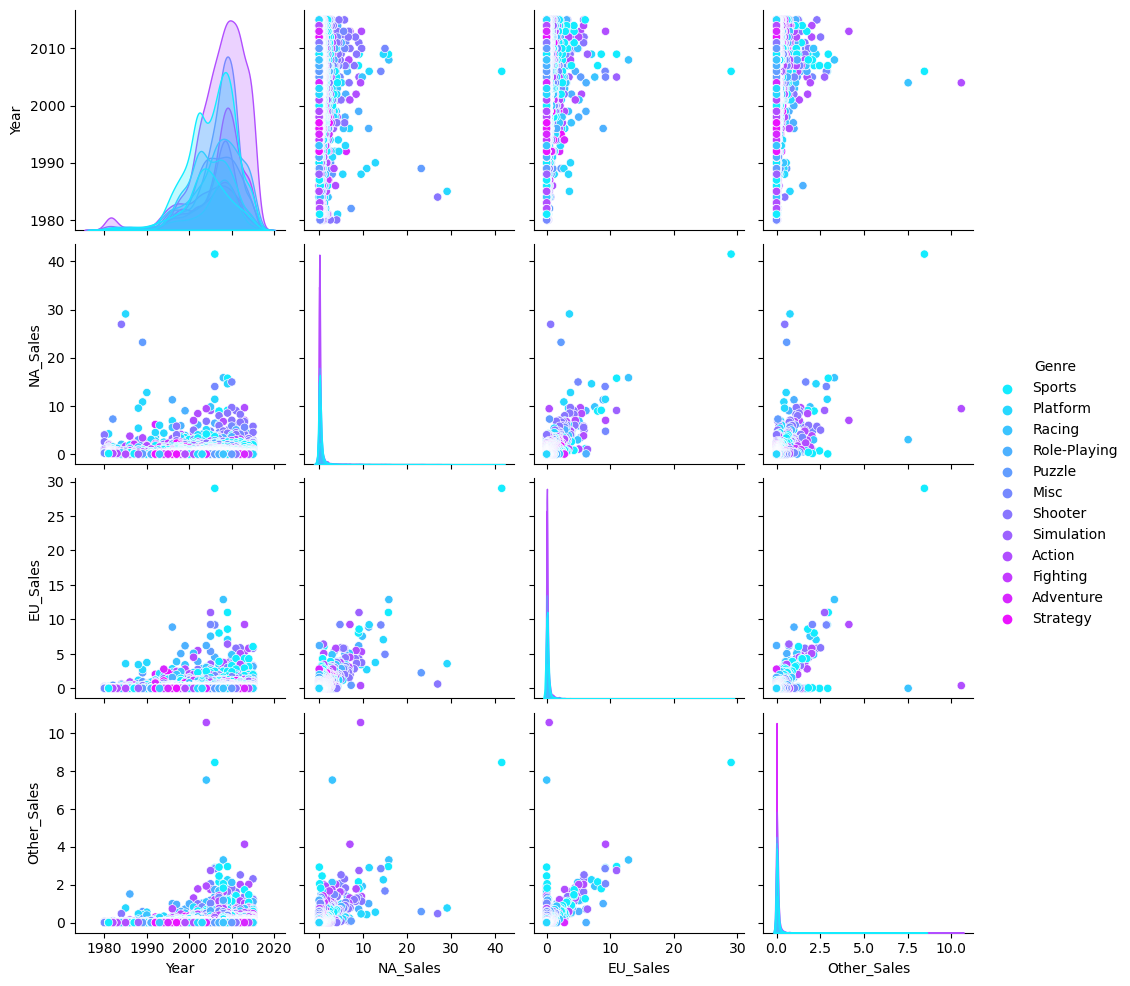

In [36]:
df_temp = df.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
df_temp
sns.pairplot(df_temp, hue="Genre", palette="cool");

### 3D Bubble Chart with Release Years, Publishers, Sales of Top 1000 Video Games

In [37]:
df1000=df.iloc[:1000,:]

In [38]:
df1000["normsales"] = (df1000["Global_Sales"] - np.min(df1000["Global_Sales"]))/(np.max(df1000["Global_Sales"])-np.min(df1000["Global_Sales"]))

In [39]:

df1000.Rank=df1000.Rank.astype("str")
df1000.Global_Sales=df1000.Global_Sales.astype("str")
trace1 = go.Scatter3d(
    y=df1000["Publisher"],
    x=df1000["Year"],
    z=df1000["normsales"],
    text="Name:"+ df1000.Name +","+" Rank:" + df1000.Rank + " Global Sales: " + df1000["Global_Sales"] +" millions",
    mode='markers',
    marker=dict(
        size=df1000['NA_Sales'],
        color = df1000['normsales'],
        colorscale = "Rainbow",
        colorbar = dict(title = 'Global Sales'),
        line=dict(color='rgb(140, 140, 170)'),
       
    )
)

data=[trace1]

layout=go.Layout(height=800, width=800, title='Top 1000 Video Games, Release Years, Publishers and Sales',
            titlefont=dict(color='rgb(20, 24, 54)'),
            scene = dict(xaxis=dict(title='Year',
                                    titlefont=dict(color='rgb(20, 24, 54)')),
                            yaxis=dict(title='Publisher',
                                       titlefont=dict(color='rgb(20, 24, 54)')),
                            zaxis=dict(title='Global Sales',
                                       titlefont=dict(color='rgb(20, 24, 54)')),
                            bgcolor = 'whitesmoke'
                           ))
 
fig=go.Figure(data=data, layout=layout)
iplot(fig)

### Sales Analysis Of Different Platforms Over Time

In [40]:
tdf = df.groupby(["Platform", "Year"]).agg({"Global_Sales": "sum"}).reset_index()
tdf = tdf.sort_values("Year", ascending=True)
tdf.head()

,Platform,Year,Global_Sales
0,2600,1980.0,11.38
1,2600,1981.0,35.77
2,2600,1982.0,28.86
3,2600,1983.0,5.83
77,NES,1983.0,10.96


In [41]:
fig = px.bar(
    tdf,
    x="Platform",
    y="Global_Sales",
    animation_frame="Year",
    range_y=[0, 150],
)
fig.update_xaxes(type="category")
fig.update_xaxes(categoryorder="category ascending")
fig.update_layout(transition = {"duration": 300, 
                               "easing": "bounce-in-out"})
fig.update_layout(title="Sales Analysis of Different Platforms")


### Correlations Between Different Columns

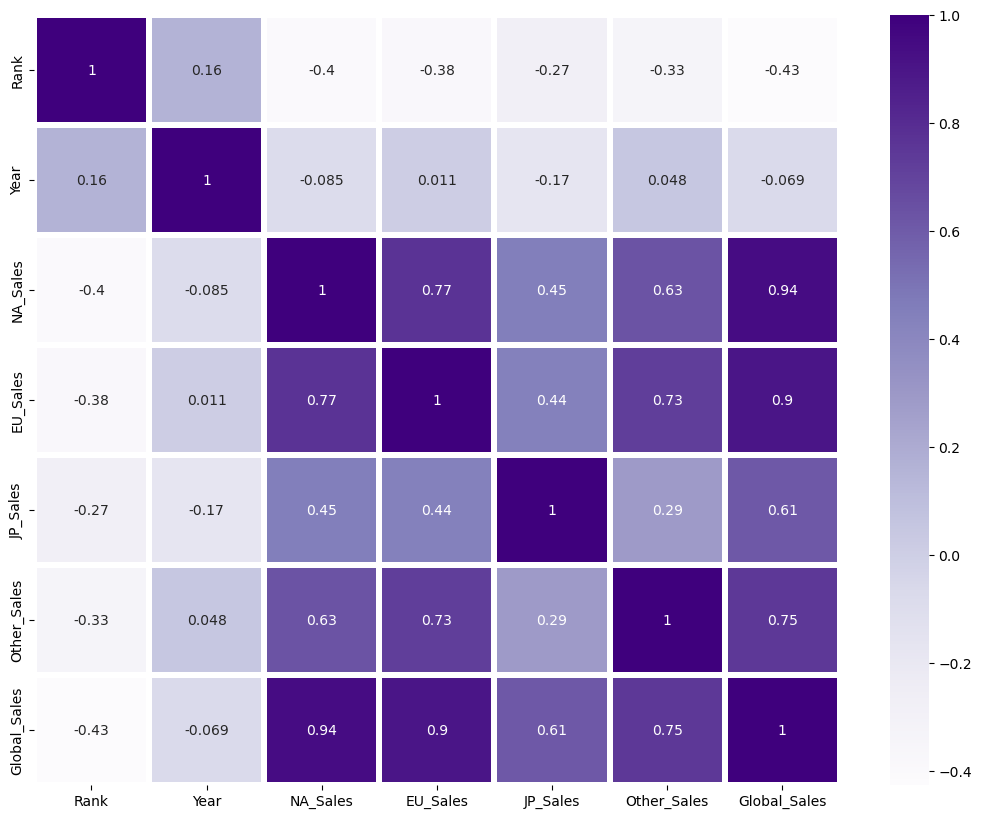

In [42]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), cmap = "Purples", annot=True, linewidth=3);

## QnA

### 1. What are the top 5 genres on which games have been made?

In [43]:
df_top_genre = df["Genre"].value_counts()
df_top_genre

Action          3132
Sports          2266
Misc            1668
Role-Playing    1428
Shooter         1250
Adventure       1241
Racing          1205
Platform         865
Simulation       838
Fighting         822
Strategy         660
Puzzle           570
Name: Genre, dtype: int64

In [44]:
df_top_genre.head()

Action          3132
Sports          2266
Misc            1668
Role-Playing    1428
Shooter         1250
Name: Genre, dtype: int64

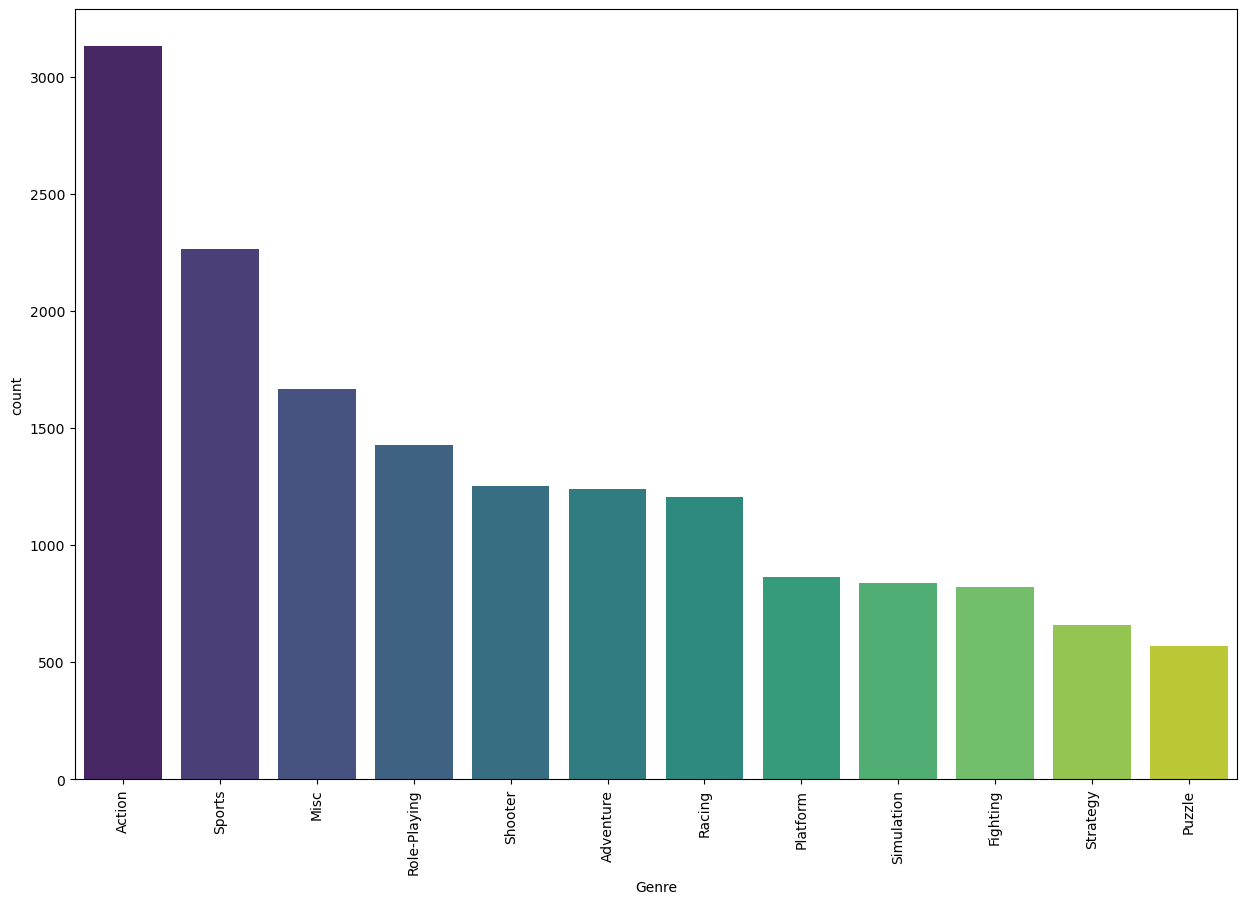

In [45]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=df, order = df["Genre"].value_counts().index, palette="viridis")
plt.xticks(rotation=90);

#### A: The Top 5 Genres on which games are made are:
    - Action
    - Sports
    - Misc(Miscellaneous)
    - Role-Playing
    - Shooter

### 2. Which genre has been sold the most in a single year?

In [46]:
year_sale = df.groupby(["Year", "Genre"])["Global_Sales"].sum().reset_index()
year_sale_idx = year_sale.groupby(["Year"])["Global_Sales"].transform(max) == year_sale["Global_Sales"]
year_sale_max = year_sale[year_sale_idx].reset_index(drop=True)
year_sale_max.head()

,Year,Genre,Global_Sales
0,1980.0,Shooter,7.07
1,1981.0,Action,14.84
2,1982.0,Puzzle,10.03
3,1983.0,Platform,6.93
4,1984.0,Shooter,31.10


In [47]:
genre = year_sale_max["Genre"]
# genre

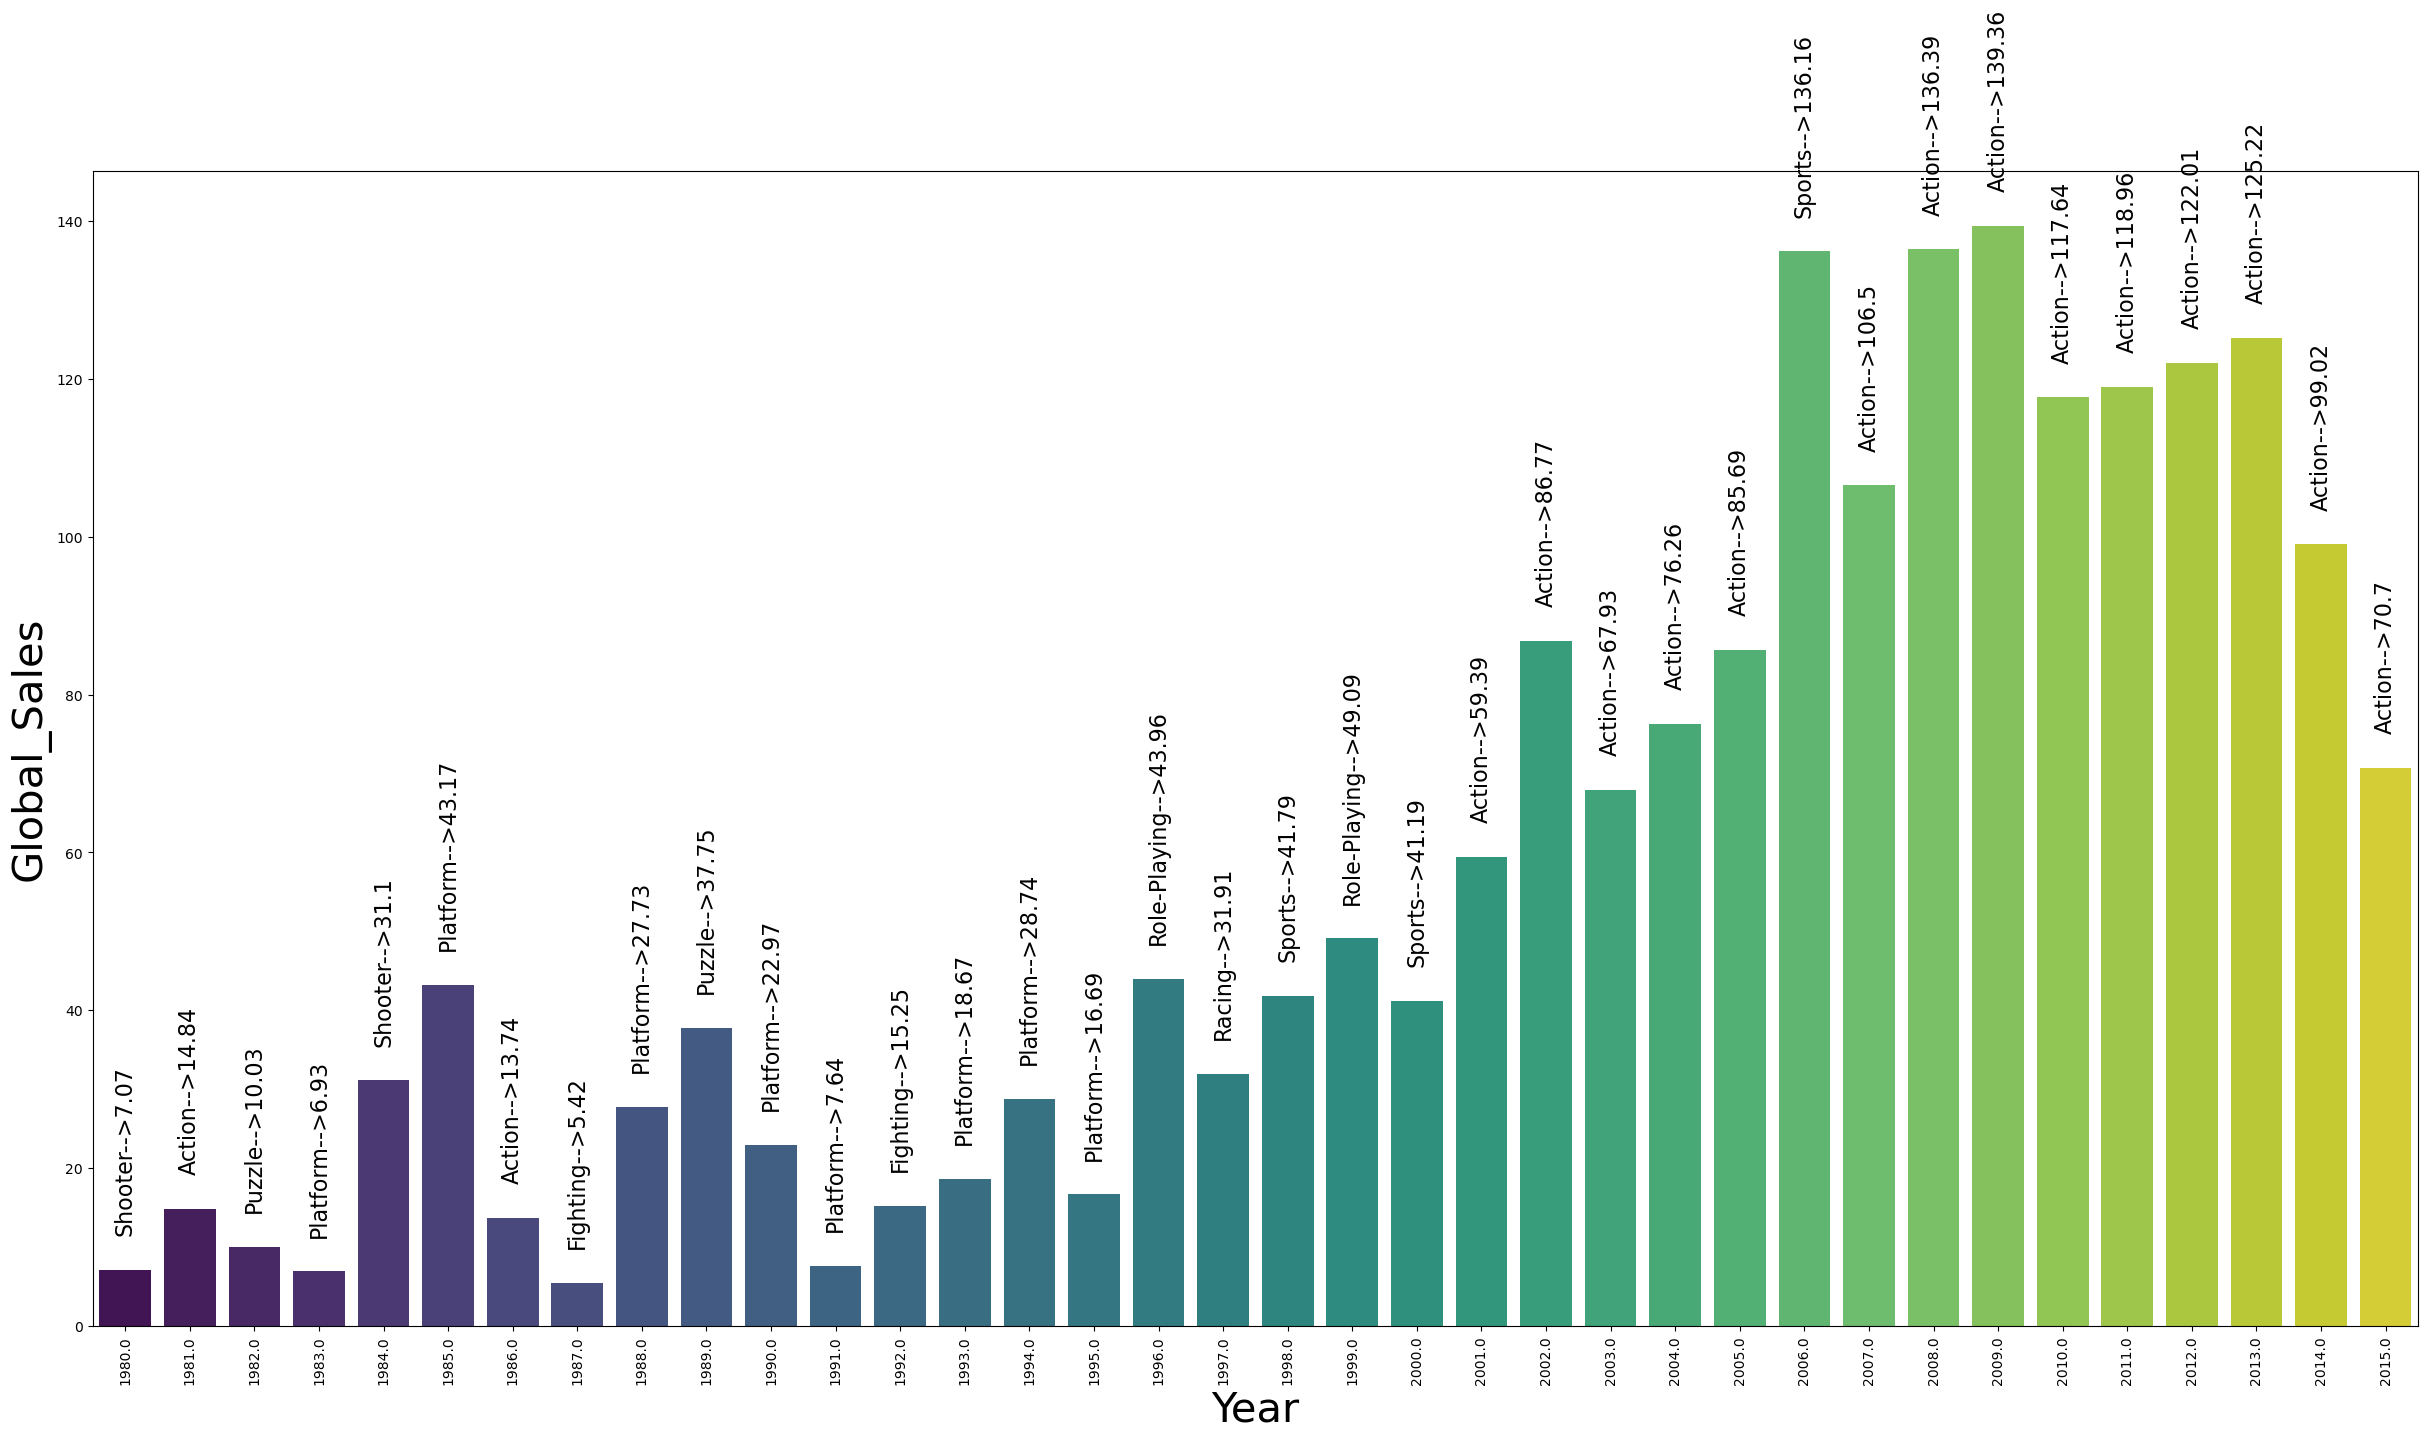

In [48]:
plt.figure(figsize=(30, 15))
b = sns.barplot(x="Year",y="Global_Sales",data=year_sale_max, palette="viridis")
index = 0
for value in year_sale_max["Global_Sales"].values:
    b.text(index, value + 5, str(genre[index] + "-->" +str(round(value,2))), color="#000", size=16, rotation= 90, ha="center")
    index += 1
b.set_xlabel("Year",fontsize=30)
b.set_ylabel("Global_Sales",fontsize=30)
plt.xticks(rotation=90);

#### A: The genre that has been sold the most in a single year is:
   Action -- 2009 (139.36 million)


### 3. Which genre has been released the most in a single year?

In [49]:
year_max = df.groupby(["Year", "Genre"]).size().reset_index(name="Count")
year_max_idx = year_max.groupby(["Year"])["Count"].transform(max) == year_max["Count"]
year_max_genre = year_max[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "Count"], keep="last").reset_index(drop=True)
year_max_genre.head()

,Year,Genre,Count
0,1980.0,Misc,4
1,1981.0,Action,25
2,1982.0,Action,18
3,1983.0,Action,7
4,1984.0,Shooter,3


In [50]:
genre = year_max_genre["Genre"].values
genre

array(['Misc', 'Action', 'Action', 'Action', 'Shooter', 'Puzzle',
       'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports', 'Sports',
       'Fighting', 'Platform', 'Sports', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action'],
      dtype=object)

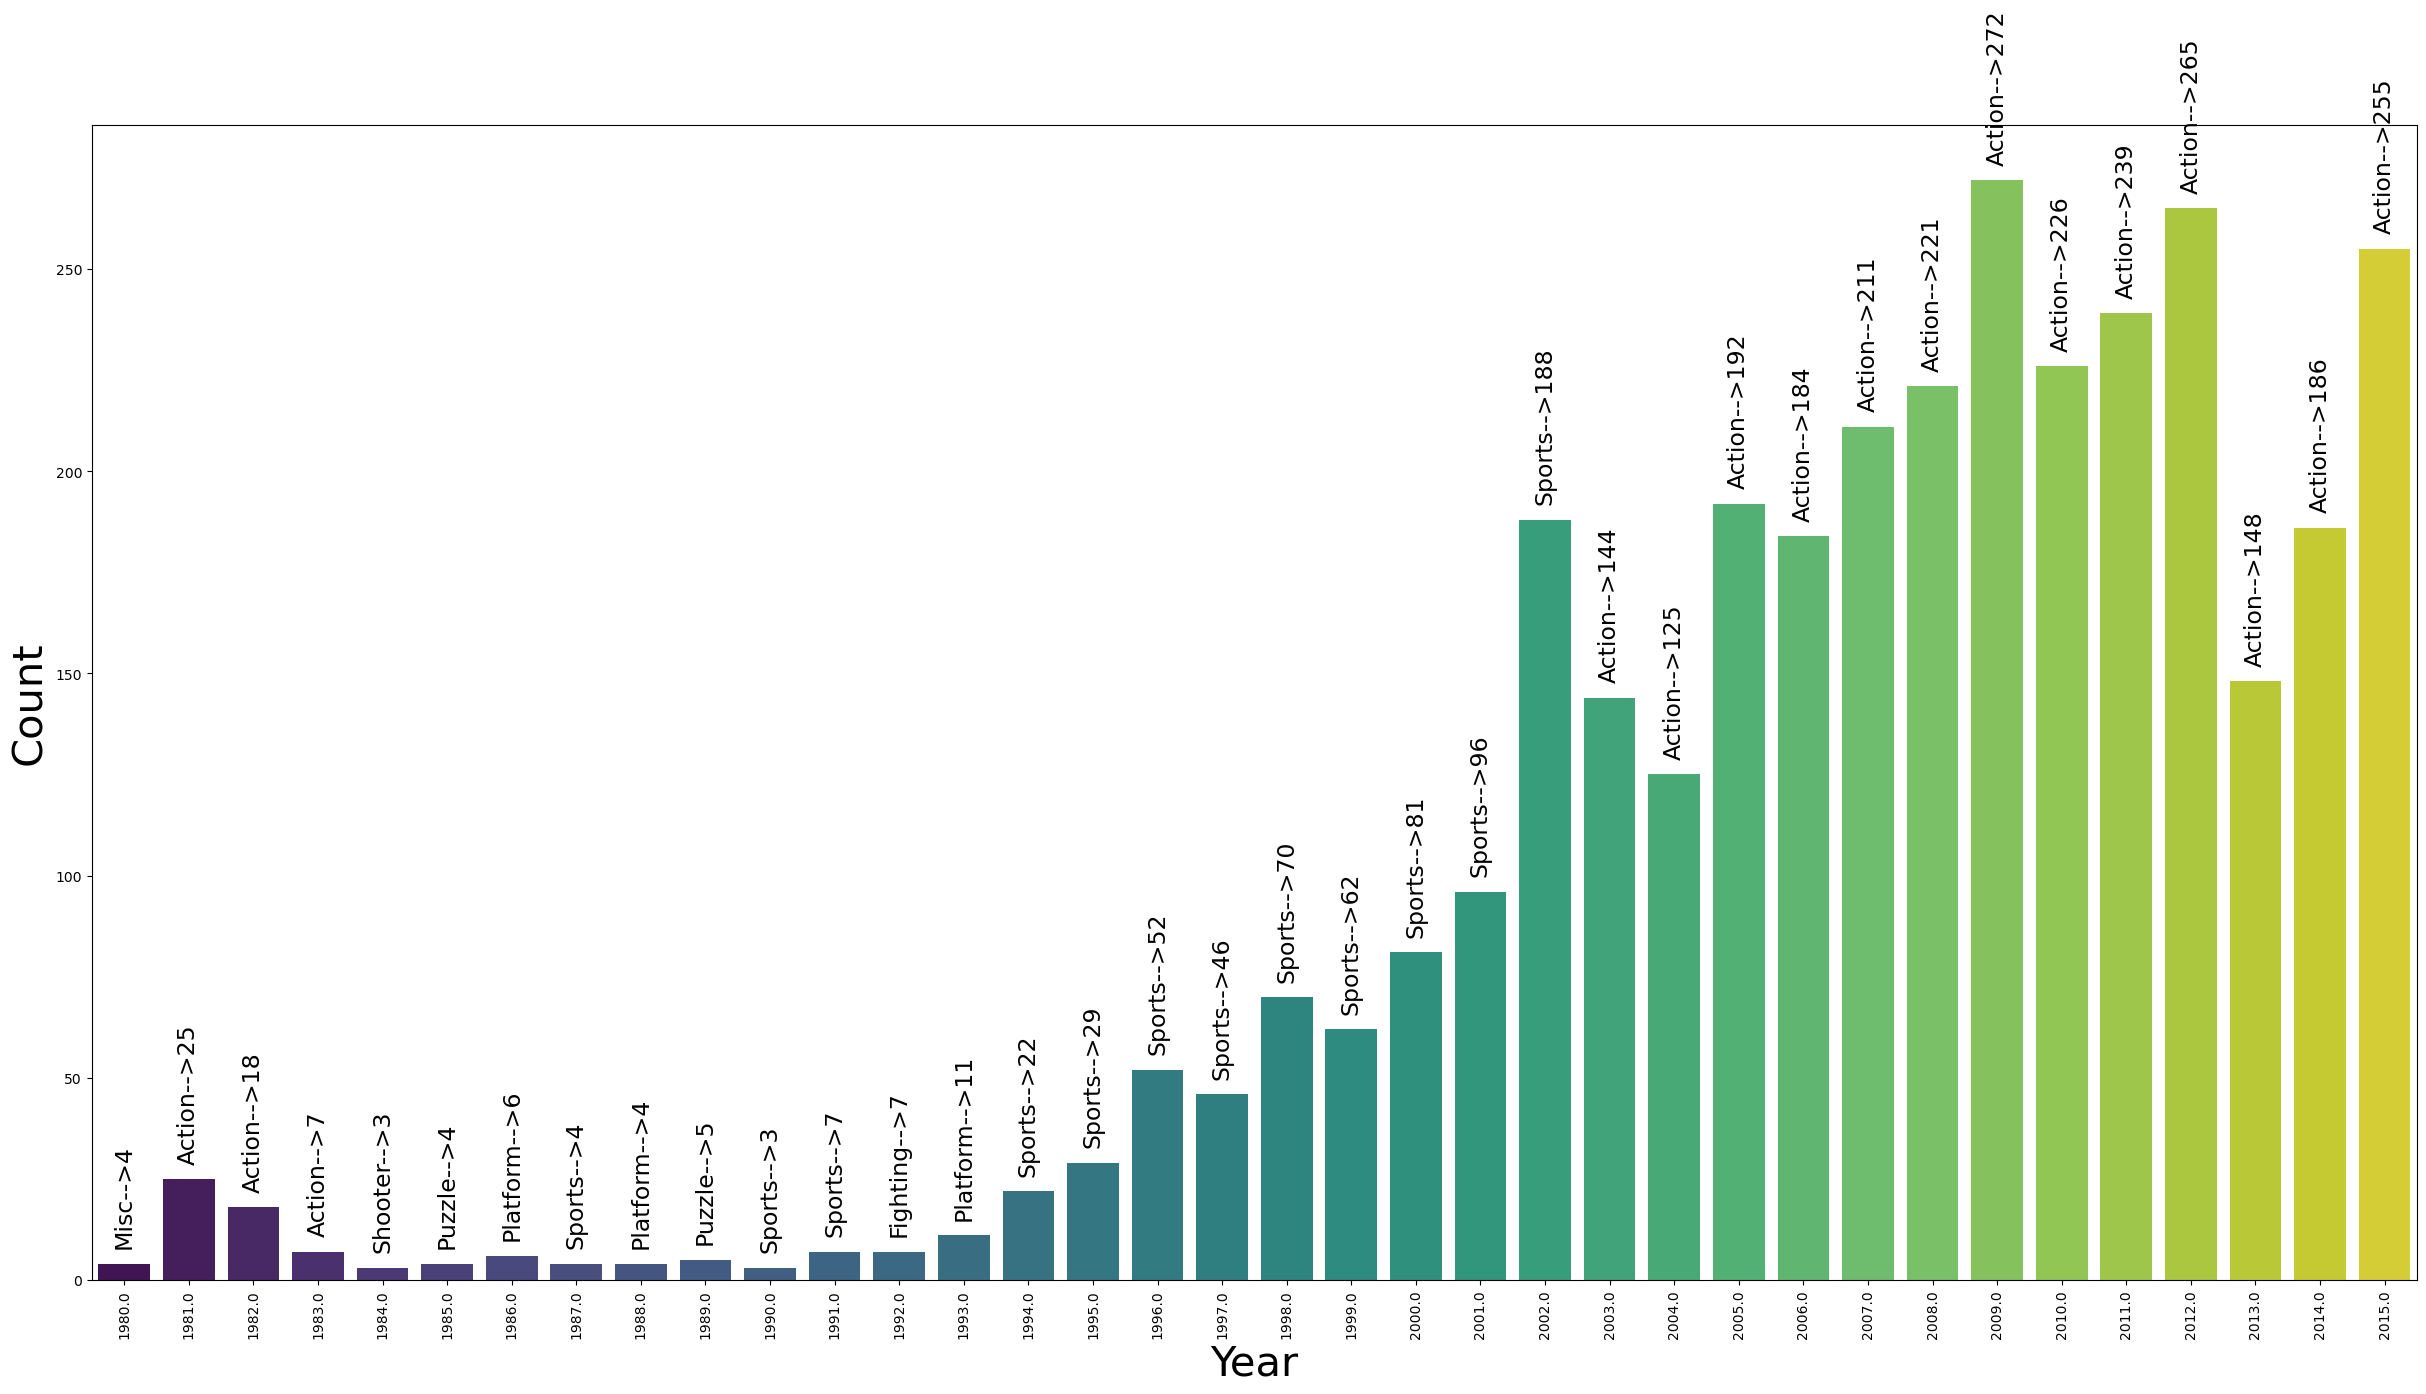

In [51]:
plt.figure(figsize=(30, 15))
a = sns.barplot(x="Year",y="Count",data=year_max_genre, palette="viridis")
index = 0
for value in year_max_genre["Count"].values:
    a.text(index, value + 5, str(genre[index] + '-->' +str(value)), color="#000", size=17, rotation= 90, ha="center")
    index += 1
a.set_xlabel("Year",fontsize=30)
a.set_ylabel("Count",fontsize=30)
plt.xticks(rotation=90);

#### A: The year in which most genre has been released is:
    Action --- 2009 (272 values)


### 4. In which year most games were released?

In [52]:
df["Year"].value_counts().head()

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
Name: Year, dtype: int64

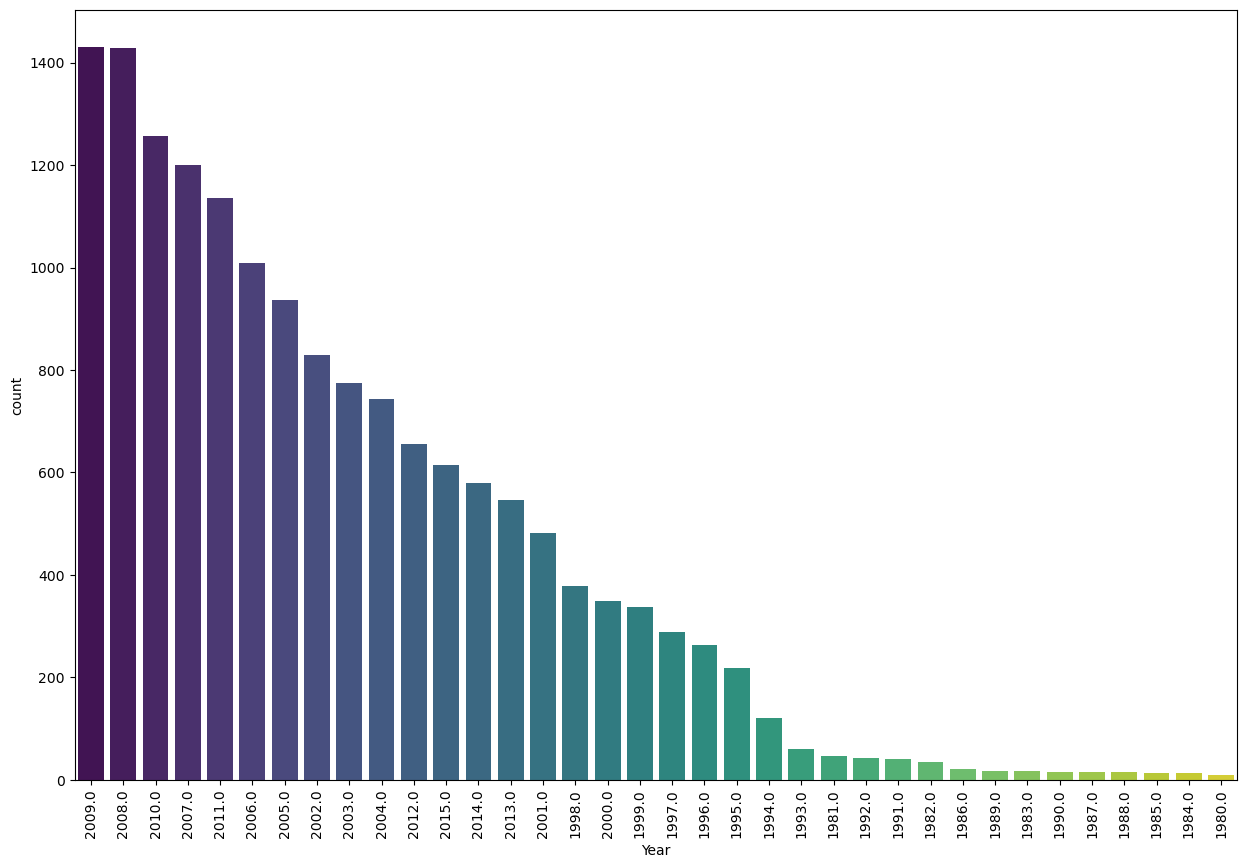

In [53]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=df, order = df.groupby(by=["Year"])["Name"].count().sort_values(ascending=False).index, palette="viridis")
plt.xticks(rotation=90);

#### A: Most video games are release in the year 2009

### 5. Which video game has the highest sales globally?

In [54]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [55]:
top_game_sales = df.groupby("Name")["Global_Sales"].sum().sort_values(ascending = False).reset_index()
top_game_sales.head()


,Name,Global_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82


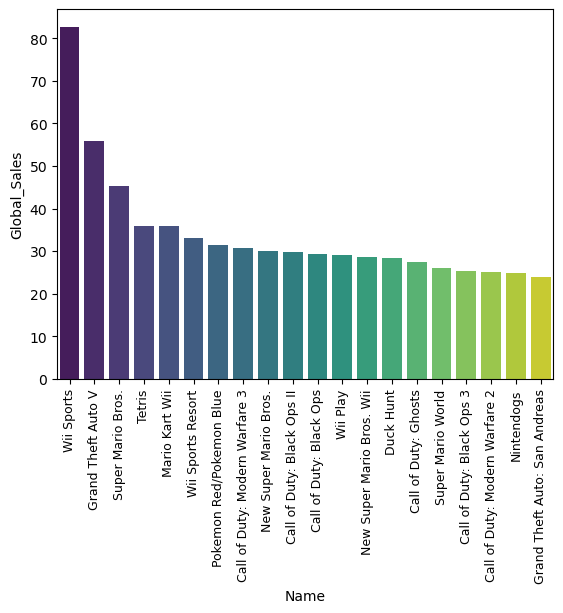

In [56]:
sns.barplot(x="Name", y="Global_Sales", data=top_game_sales.head(20), palette="viridis")
plt.xticks(rotation=90, size=9);

#### A: The video game with highest global sales:
    -Wii sports
    -Grand Theft Auto V
    -Super Mario Bros.



### 6.How is the distribution of data?

In [57]:
log_data = df.copy()
log_data = log_data[log_data.NA_Sales != 0]
log_data = log_data[log_data.EU_Sales != 0]
log_data = log_data[log_data.JP_Sales != 0]
log_data = log_data[log_data.Other_Sales != 0]
log_data = log_data[log_data.Global_Sales != 0]

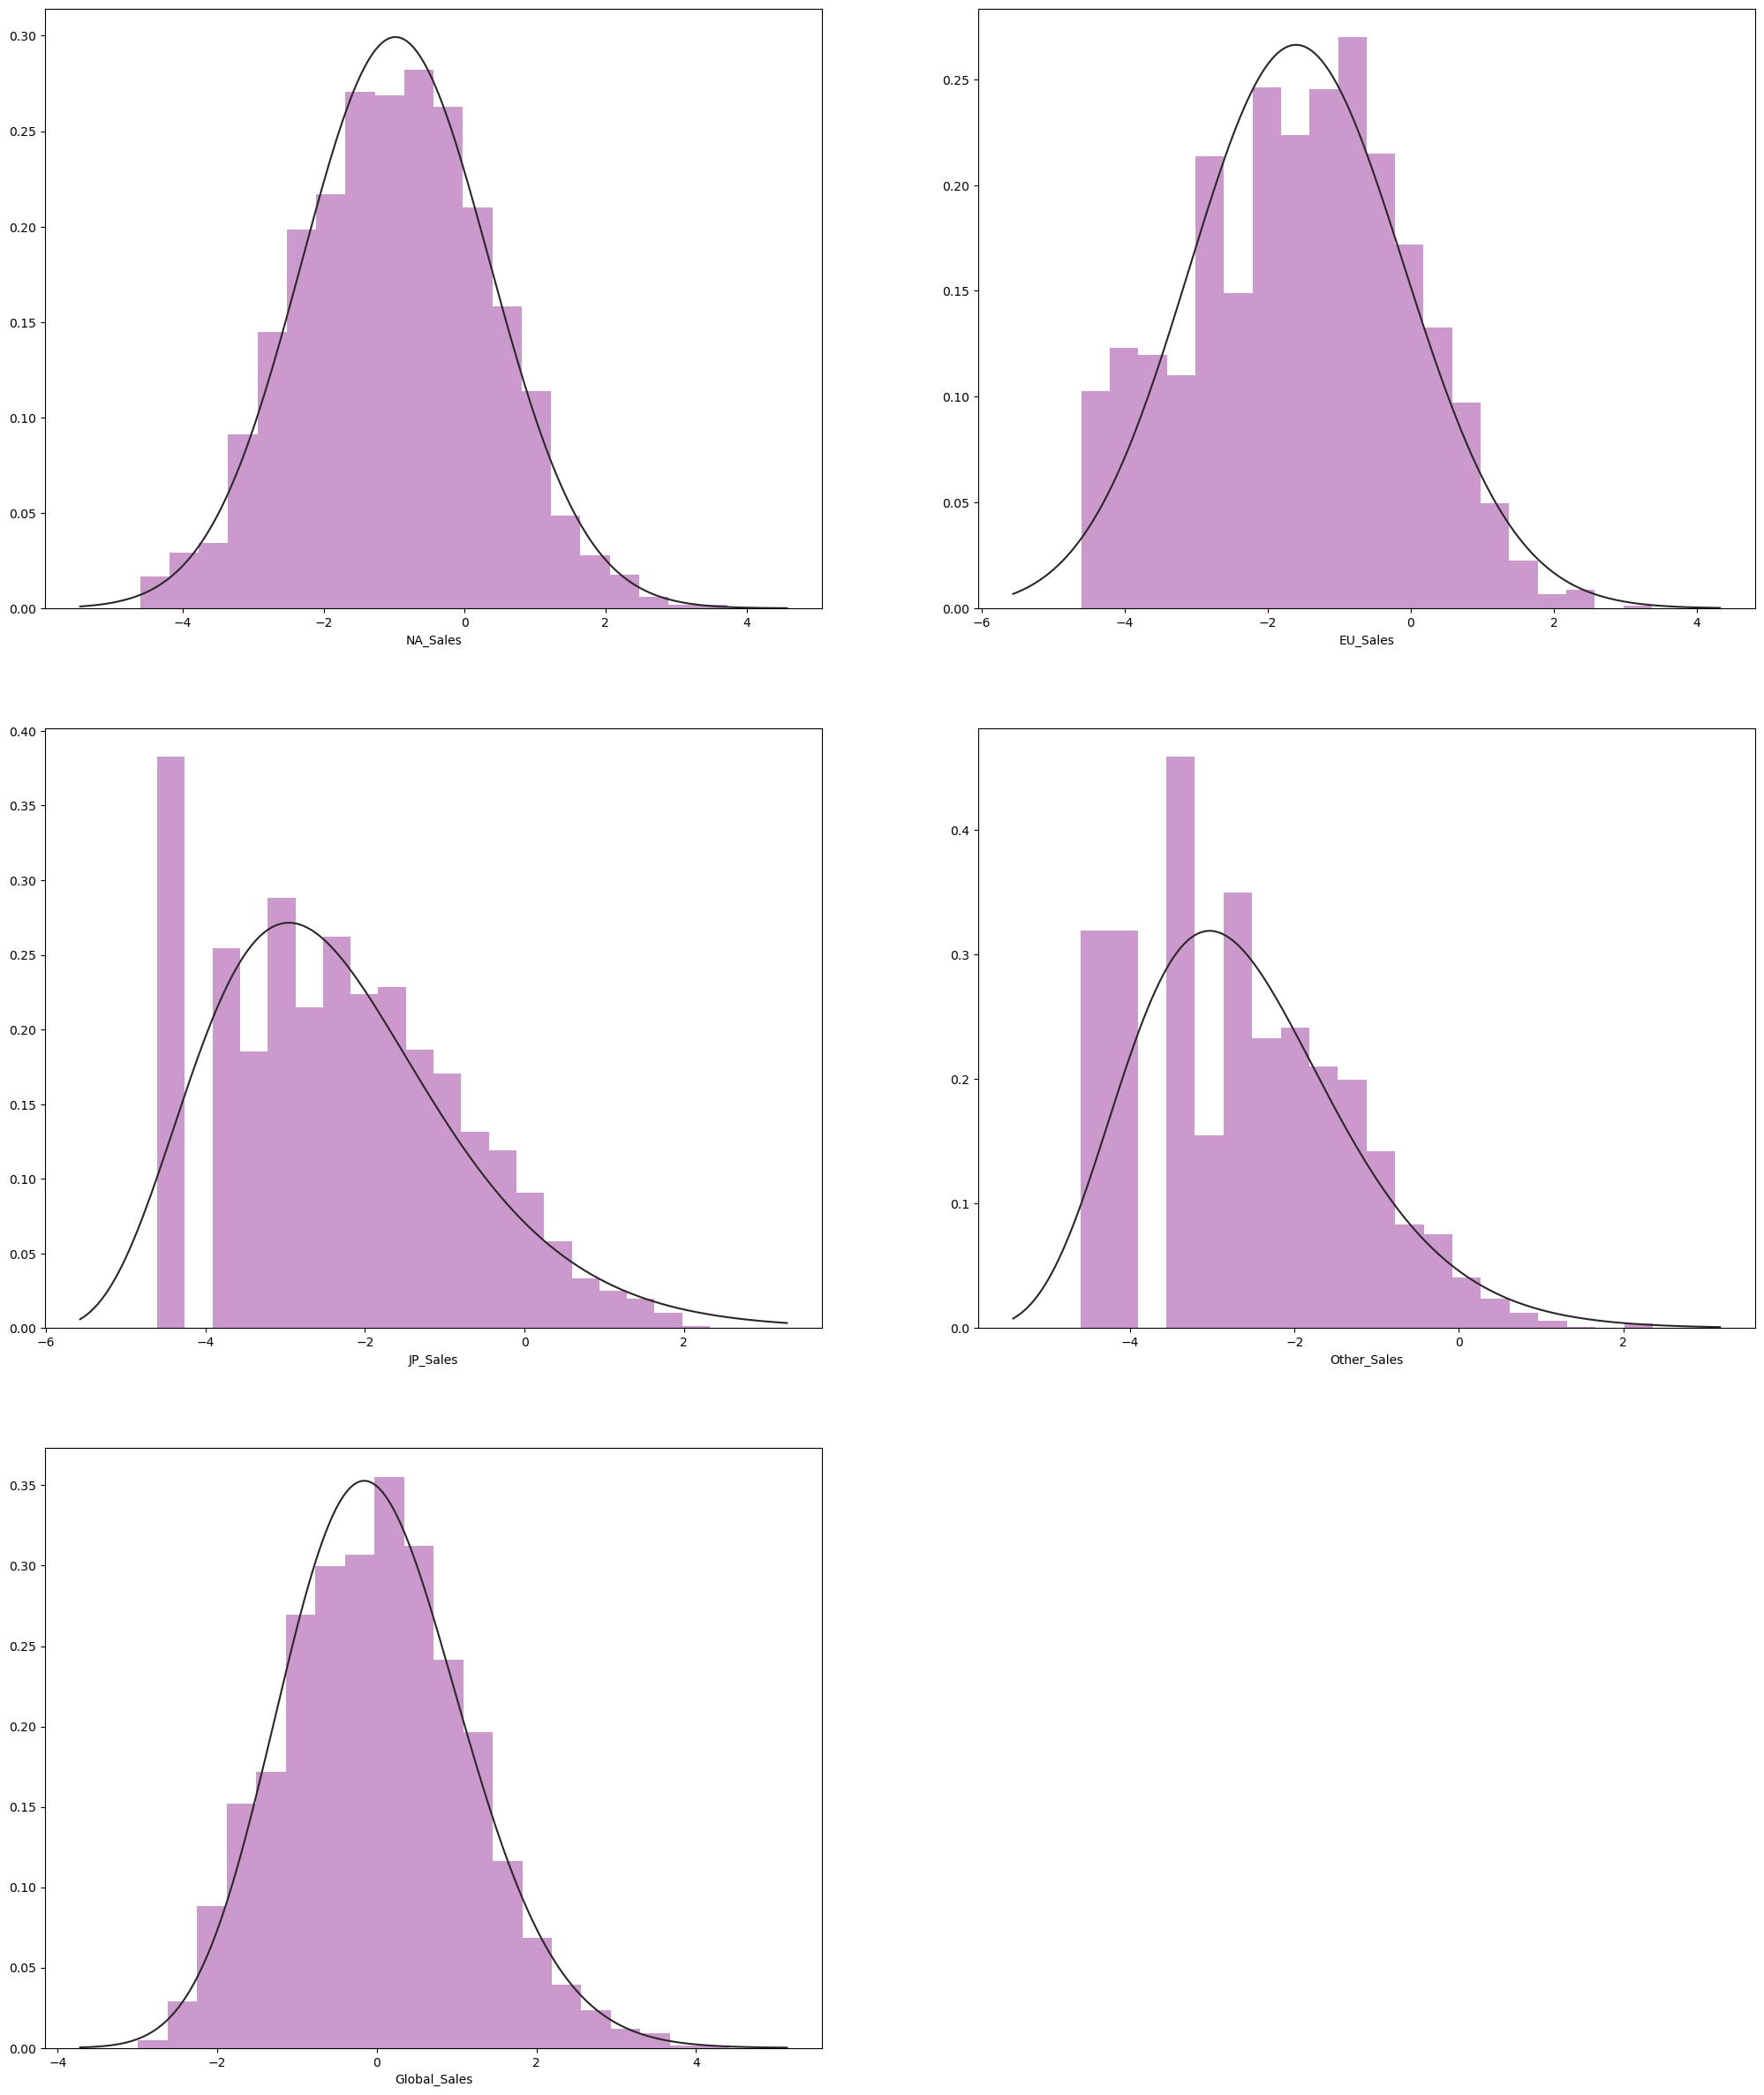

In [58]:
plt.figure(figsize=(25,30))
sales_columns = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(log_data[column]), bins=20, kde=False, fit=stats.gamma, color="purple"); 

#### A: By watching the above histograms, we can say that most of our data is right-skewed and symmetric after log transformation

## WordCloud

In [59]:
wmask= np.array(Image.open("567.png"))
wmask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [60]:
#Function to convert '0' values into '255' values
def transform_zeros(val):
    if val == 0:
        return 255
    else:
        return val

In [61]:
maskable_image = np.ndarray((wmask.shape[0],wmask.shape[1]), np.int32)

In [62]:
for i in range(len(wmask)):
    maskable_image[i] = list(map(transform_zeros, wmask[i]))

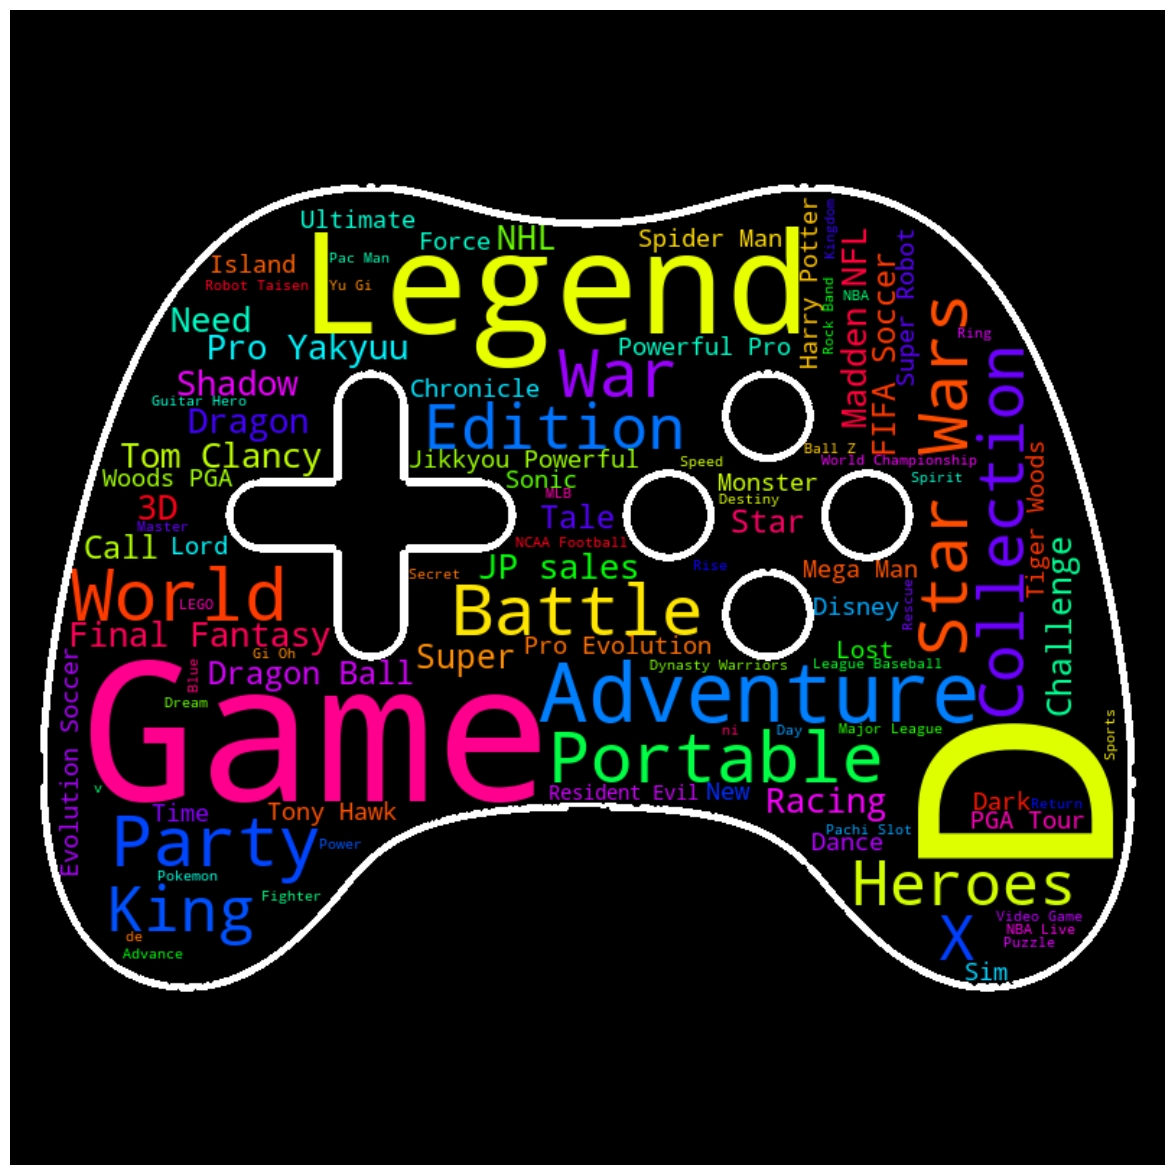

In [63]:
wave_mask= np.array(Image.open("567.png"))
stopwords = set(STOPWORDS)
stopwords.update(["II", "III"])
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(mask=maskable_image,background_color="black",colormap="hsv" ,contour_width=2, contour_color="white",
                      width=950,stopwords=stopwords,
                          height=950,
                      max_words=100
                         ).generate(" ".join(df.Name))

plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.savefig('graph.png')

plt.show()